GPUで学習を行いましょう

In [1]:
!nvidia-smi

Mon Sep 26 16:44:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/trashart

/content/drive/MyDrive/trashart


In [4]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data.csv")
X = df.drop("plastic_type", axis=1).values
y = to_categorical(df[["plastic_type"]].values)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = Sequential([
    Dense(600, input_shape=(513,), activation="relu", name="dense_1"),
    Dense(4, activation="softmax", name="dense_2")
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
hist = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
3/3 [==============================] - 2s 194ms/step - loss: 937.3546 - accuracy: 0.4000 - val_loss: 1673.0039 - val_accuracy: 0.4737
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 619.1222 - accuracy: 0.6533 - val_loss: 1901.7422 - val_accuracy: 0.6842
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 644.5914 - accuracy: 0.7333 - val_loss: 2041.4023 - val_accuracy: 0.5789
Epoch 4/50
3/3 [==============================] - 0s 34ms/step - loss: 369.3586 - accuracy: 0.8000 - val_loss: 1505.8297 - val_accuracy: 0.6316
Epoch 5/50
3/3 [==============================] - 0s 35ms/step - loss: 62.2816 - accuracy: 0.8933 - val_loss: 1277.8323 - val_accuracy: 0.5789
Epoch 6/50
3/3 [==============================] - 0s 35ms/step - loss: 132.8672 - accuracy: 0.8267 - val_loss: 1160.1984 - val_accuracy: 0.6316
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 52.2889 - accuracy: 0.8533 - val_loss: 1066.6676 - val_accuracy: 

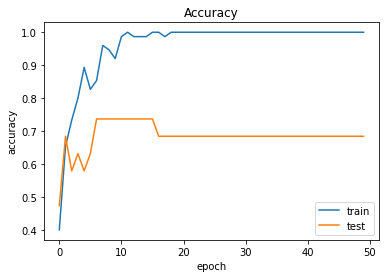

In [10]:
plt.figure()
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()

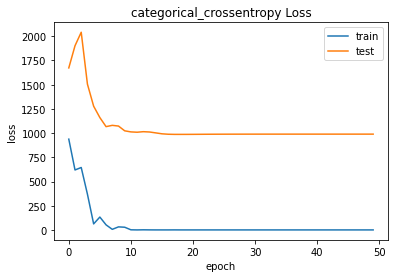

In [11]:
plt.figure()
plt.title("categorical_crossentropy Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="test")
plt.legend()
plt.show()

In [12]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print("Train loss:", train_score[0])
print("Train accuracy:", train_score[1])
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])

1/1 [==============================] - 0s 51ms/step - loss: 989.1836 - accuracy: 0.6842
Train loss: 0.0
Train accuracy: 1.0
Test loss: 989.18359375
Test accuracy: 0.6842105388641357


In [13]:
model.save("plastic-classification.h5")